## Student Performance Analysis and Visualization

In [1]:
pip install dabl

Note: you may need to restart the kernel to use updated packages.


In [2]:
# for some basic operations

import numpy as np 
import pandas as pd

# for visualiztions
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import dabl

import os
print(os.listdir('../documents/input/'))

['StudentsPerformance.csv']


### Reading the Data set

In [3]:
# reading the data

data = pd.read_csv('../documents/input/StudentsPerformance.csv')

# getting the shape of the data
print(data.shape)

(1000, 8)


In [4]:
# looking at the head of the data

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Descriptive Statistics

In [5]:
# describing the dataset

data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# check the no. of unique items present in the categorial column

data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [7]:
# check the percentage of missing data in each column present in the data

no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


Target looks like regression


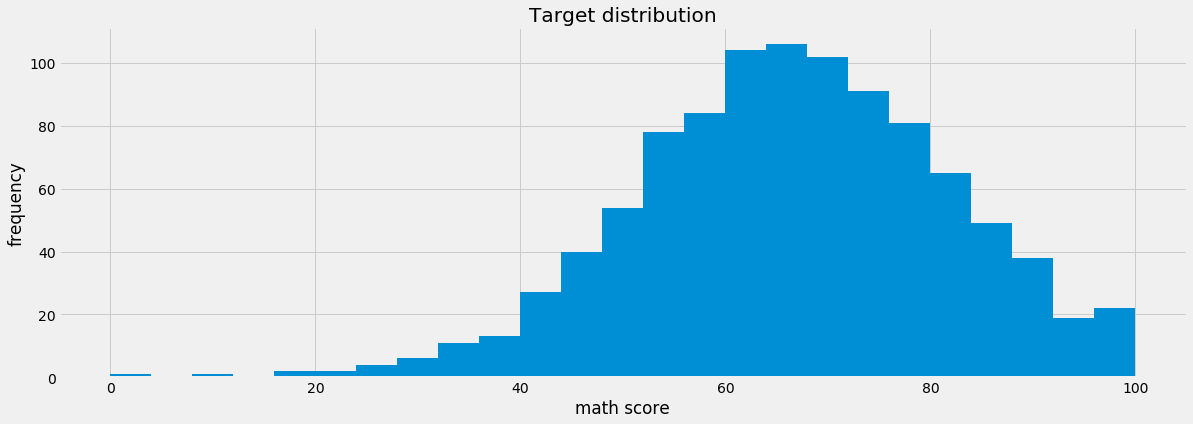

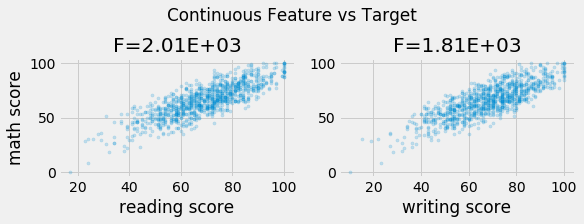

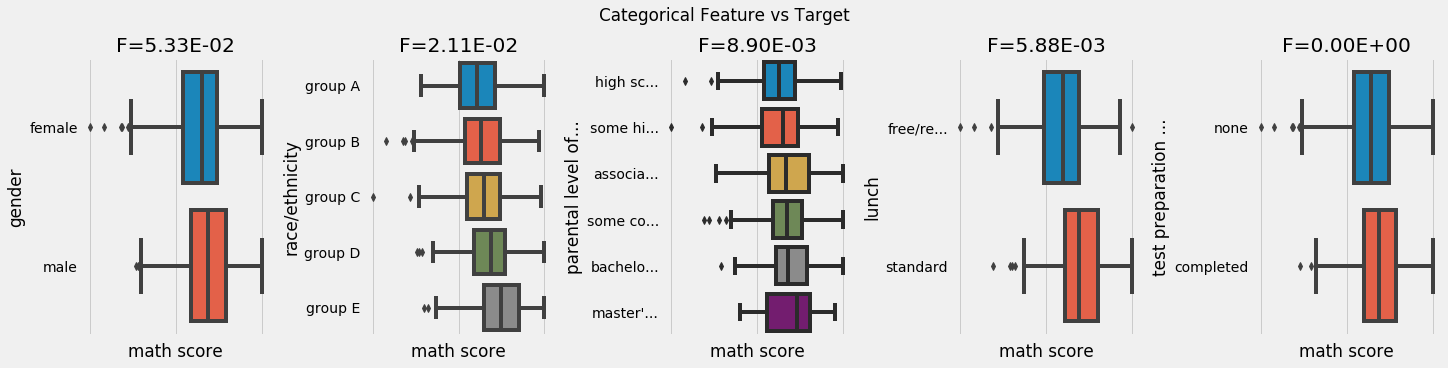

In [8]:
# comparison of all the attributes with respect to Math Marks

plt.rcParams['figure.figsize'] = (18,6)
plt.style.use('fivethirtyeight')
dabl.plot(data,target_col = 'math score')

Target looks like regression


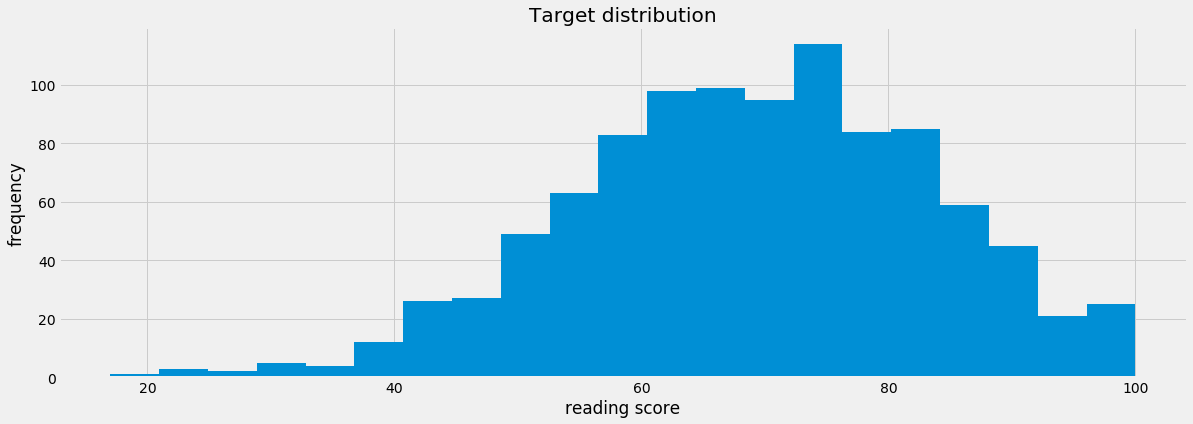

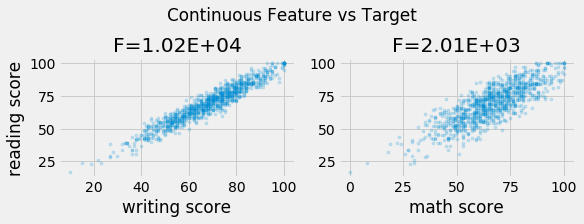

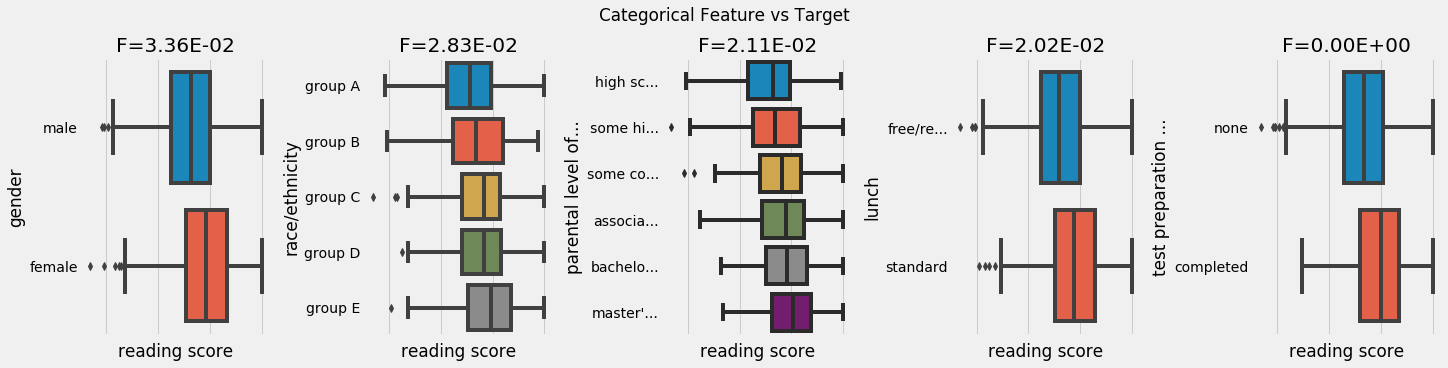

In [9]:
# comparison of all other attributes with respect to Reading Marks

plt.rcParams['figure.figsize'] = (18,6)
plt.style.use('fivethirtyeight')
dabl.plot(data,target_col = 'reading score')

Target looks like regression


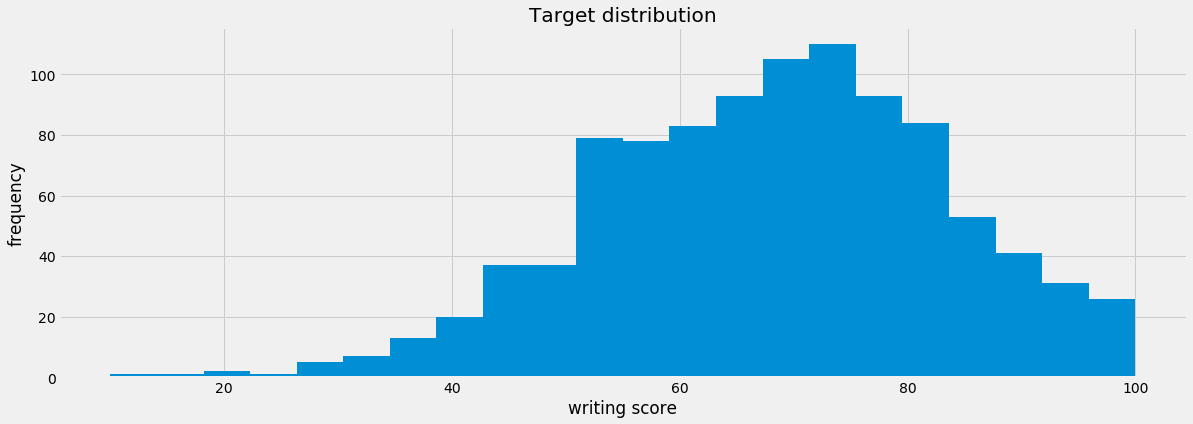

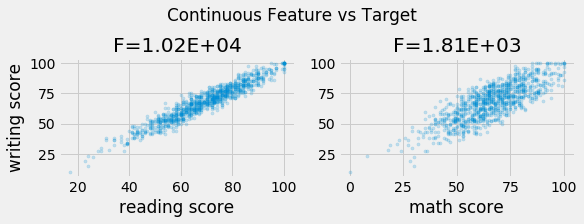

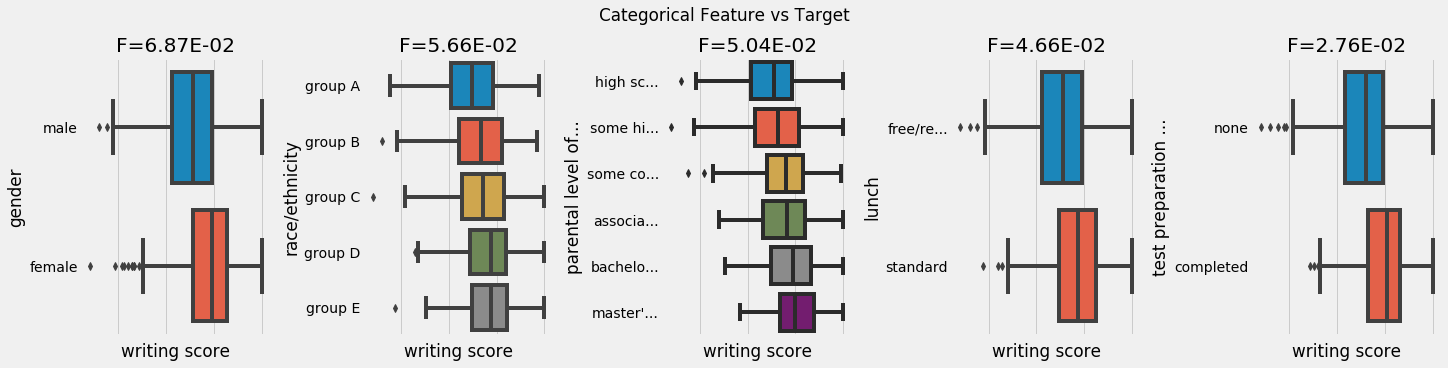

In [10]:
# comparison of all the other attributes with respect to Writing Marks

plt.rcParams['figure.figsize'] = (18,6)
plt.style.use('fivethirtyeight')
dabl.plot(data,target_col = 'writing score')

### Inferential Statistics

##### Probability of Students Scoring More than 50 Marks in all three Subjects

In [11]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['math score'] > 50].shape[0]
probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Math :",probability_of_students_scoring_more_than_50_in_maths)

Probability of Students Scoring more than 50 marks in Math : 85.0


In [12]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['reading score'] > 50].shape[0]
probability_of_students_scoring_more_than_50_in_reading = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Reading :",probability_of_students_scoring_more_than_50_in_reading)

Probability of Students Scoring more than 50 marks in Reading : 90.3


In [13]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['writing score'] > 50].shape[0]
probability_of_students_scoring_more_than_50_in_writing = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Writing :",probability_of_students_scoring_more_than_50_in_writing)

Probability of Students Scoring more than 50 marks in Writing : 87.6


##### Probability of Students Passing in all the three Subjects

In [14]:
total_students = data.shape[0]
number_of_students_passing_in_all_subjects = data[(data['math score'] > 40) & (data['writing score'] > 40) & (data['reading score'] > 40)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects/total_students)*100
print("The Probability of Students Passing in all the Subjects is {0:.2f}%".format(probability_of_students_passing_in_all_the_subjects))

The Probability of Students Passing in all the Subjects is 93.90%


In [15]:
total_students = data.shape[0]
number_of_students_scoring_more_than_90 = data[(data['math score'] > 90) & (data['writing score'] > 90) & (data['reading score'] > 90)].shape[0]
probability_of_students_scoring_more_than_90_in_all_the_subjects = (number_of_students_scoring_more_than_90/total_students)*100
print("The Probability of Students Scoring more than 90 in all the Subjects is {0:.2f}%".format(probability_of_students_scoring_more_than_90_in_all_the_subjects))

The Probability of Students Scoring more than 90 in all the Subjects is 2.30%


##### Skewness for the Maths, Reading and Writing Scores

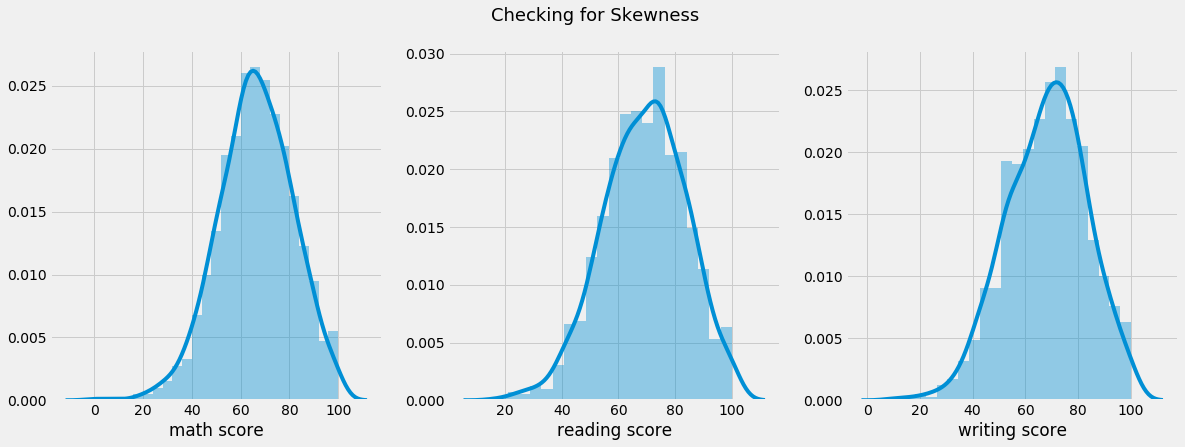

In [16]:
plt.subplot(1, 3, 1)
sns.distplot(data['math score'])

plt.subplot(1, 3, 2)
sns.distplot(data['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(data['writing score'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

In [17]:
# taking seed so that everytime the random values come out to be constant 
np.random.seed(6)

# taking 100 sample values from the dataset of 1000 values 
sample_math_marks = np.random.choice(a = data['math score'], size = 100)

# getting the sample mean
print("Sample mean for Math Scores :",sample_math_marks.mean())

# getting the population mean
print("Population mean for Math Scores :",data['math score'].mean())

# taking 100 sample values from the dataset of 1000 values
sample_reading_marks = np.random.choice(a = data['reading score'], size = 100)

# getting the sample mean
print("\nSample mean for Reading Scores :",sample_reading_marks.mean())

# getting the population mean
print("Population mean for Reading Scores :",data['reading score'].mean())

# taking 100 sample values from the dataset of 1000 values
sample_writing_marks = np.random.choice(a = data['writing score'], size = 100)

# getting the sample mean
print("\nSample mean for Writing Scores :",sample_writing_marks.mean())

# getting the population mean
print("Population mean for Writing Scores :",data['writing score'].mean())

Sample mean for Math Scores : 63.12
Population mean for Math Scores : 66.089

Sample mean for Reading Scores : 68.5
Population mean for Reading Scores : 69.169

Sample mean for Writing Scores : 71.46
Population mean for Writing Scores : 68.054


##### Confidence Interval for Math Score

In [18]:
# import the scipy package
import scipy.stats as stats
import math

# seed the random value
np.random.seed(10)

# taking a sample size
sample_size = 1000
sample = np.random.choice(a = data['math score'], size = sample_size)
sample_mean = sample.mean()

# getting the z-critical value
z_critical = stats.norm.ppf(q = 0.95)

# checking the z-critical value
print("z-critical value: ",z_critical)

# getting the population standard deviation
pop_stdev = data['math score'].std()

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

# defining  the confidence interval
confidence_interval = (sample_mean - margin_of_error,sample_mean + margin_of_error)

#printing the results
print("Confidence interval:",end="")
print(confidence_interval)
print("True mean: {}".format(data['math score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval:(64.82729483328328, 66.40470516671672)
True mean: 66.089


##### Confidence Interval for Reading Score

In [19]:
# importing the scipy package
import scipy.stats as stats
import math

# seeding the random values
np.random.seed(10)

# taking a sample size 
sample_size = 1000
sample = np.random.choice(a = data['reading score'], size = sample_size)
sample_mean = sample.mean()

# getting the z-critical value
z_critical = stats.norm.ppf(q = 0.95)

# checking the z-critical value
print("z-critical value: ",z_critical)

# checking the population standard deviation
pop_stdev = data['reading score'].std()

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

# defining confidence interval
confidence_interval = (sample_mean - margin_of_error,sample_mean + margin_of_error)

# printing the results
print("Confidence interval:",end="")
print(confidence_interval)
print("True mean: {}".format(data['reading score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval:(67.75757337011645, 69.27642662988355)
True mean: 69.169


##### Confidence Interval for Writing Score

In [20]:
# seeding the random values
np.random.seed(10)

# taking a sample size 
sample_size = 1000
sample = np.random.choice(a = data['writing score'], size = sample_size)
sample_mean = sample.mean()

#gettng the z-critical value
z_critical = stats.norm.ppf(q = 0.95)

# checking the z-critical value
print("z-critical value: ",z_critical)

# getting the population standard deviation
pop_stdev = data['writing score'].std()

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

# defining confidence variable
confidence_interval = (sample_mean - margin_of_error,sample_mean + margin_of_error)

# printing the results
print("Confidence interval:",end="")
print(confidence_interval)
print("True mean: {}".format(data['writing score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval:(66.80960035030861, 68.39039964969137)
True mean: 68.054


### Grouping Operations

##### Number of Students Scoring 90 in all the Subjects

In [21]:
data[(data['gender'] == 'female') & (data['math score'] > 90) & (data['writing score'] > 90) & (data['reading score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99
685,female,group E,master's degree,standard,completed,94,99,100
712,female,group D,some college,standard,none,98,100,99


##### Compare the scores secured by Boys and Girls 

In [22]:
data.groupby(['gender']).agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

##### Effect of Lunch on Student's Performance

In [23]:
data[['lunch','gender','math score','reading score','writing score']].groupby(['lunch','gender']).agg('median')

math score  reading score  writing score
lunch        gender                                          
free/reduced female        57.0           67.0           68.0
             male          62.0           61.0           59.0
standard     female        67.0           75.0           76.0
             male          72.0           67.5           67.0

##### Effect of Test Preparation on Student's Performance

In [24]:
data[['test preparation course','gender','math score','reading score','writing score']].groupby(['test preparation course','gender']).agg('median')

math score  reading score  writing score
test preparation course gender                                          
completed               female          67             78             79
                        male            73             71             70
none                    female          62             71             70
                        male            67             63             60

##### Effect of Race and Ethnicity on Student's Performance

In [25]:
data[['race/ethnicity','math score','reading score','writing score']].groupby(['race/ethnicity']).agg('median')

,math score,reading score,writing score
race/ethnicity,,,
group A,61.0,64.0,62.0
group B,63.0,67.0,67.0
group C,65.0,71.0,68.0
group D,69.0,71.0,72.0
group E,74.5,74.0,72.0


### Data Visualizations

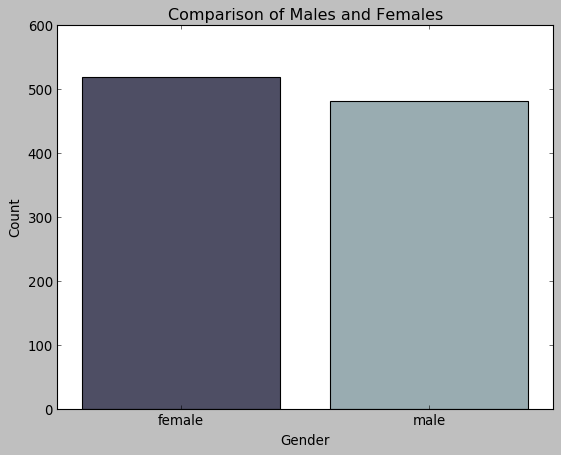

In [26]:
# visualising the number of male and female in the data set

plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('_classic_test')
sns.countplot(data['gender'],palette = 'bone')
plt.title('Comparison of Males and Females',fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

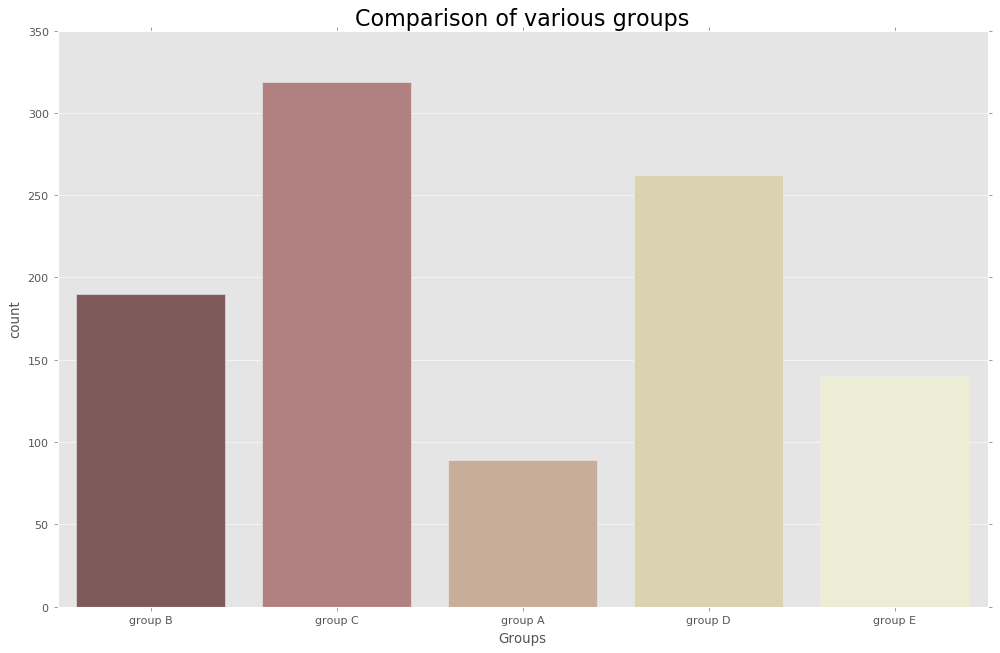

In [27]:
# visualising the different groups in the dataset

plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'],palette = 'pink')
plt.title('Comparison of various groups',fontweight = 30,fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

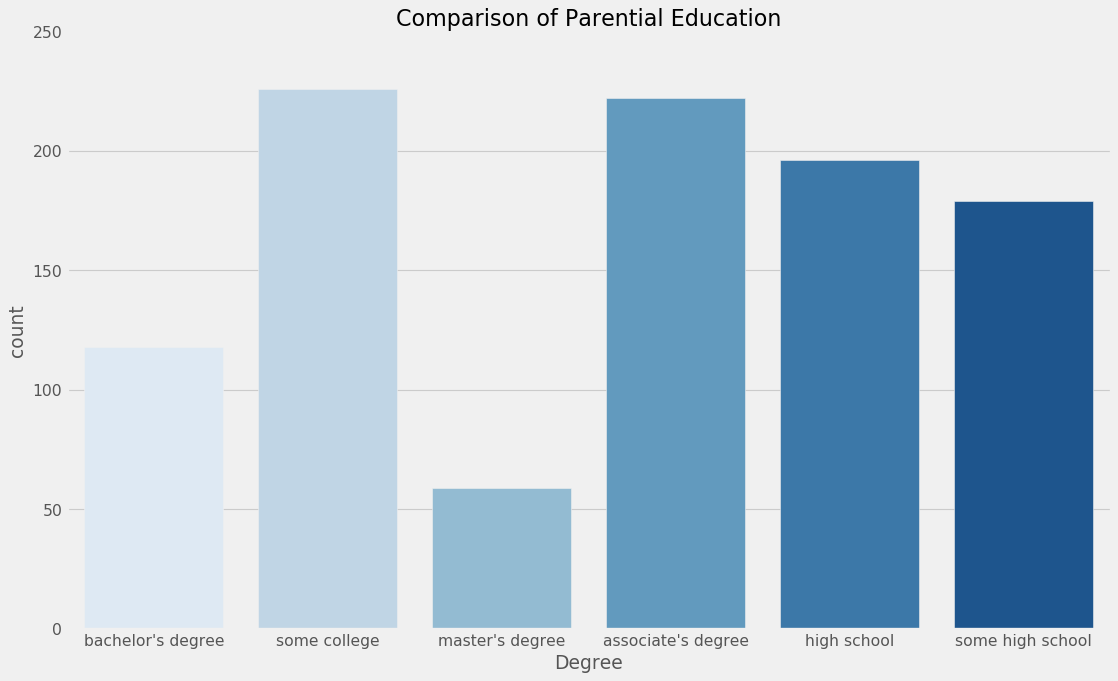

In [28]:
# visualising the different parental education levels

plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'],palette = 'Blues')
plt.title('Comparison of Parential Education', fontweight = 30,fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

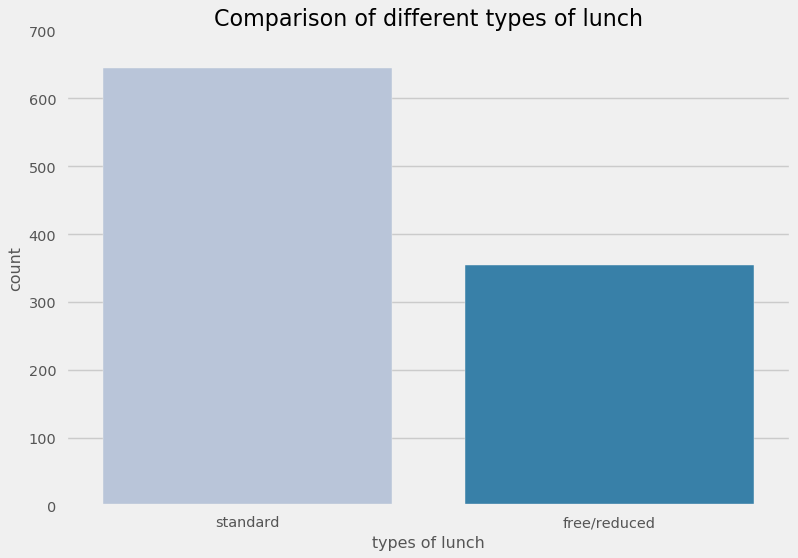

In [29]:
# visualising different types of lunch

plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')

sns.countplot(data['lunch'],palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30,fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

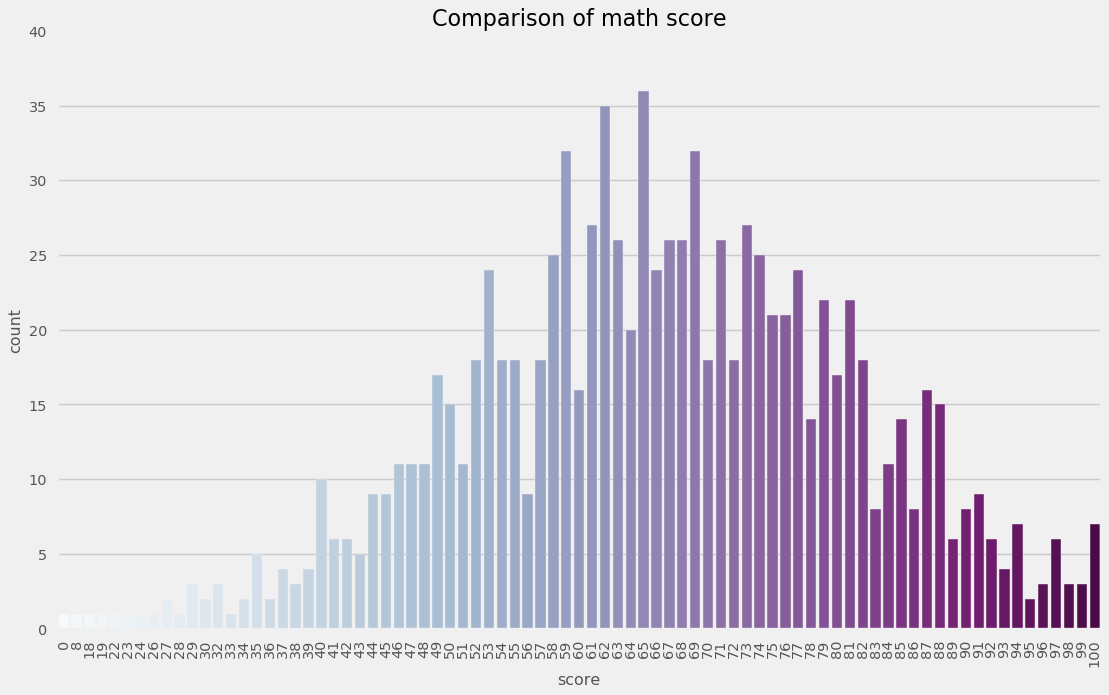

In [30]:
# visualising math score

plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['math score'],palette = 'BuPu')
plt.title('Comparison of math score', fontweight = 30,fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

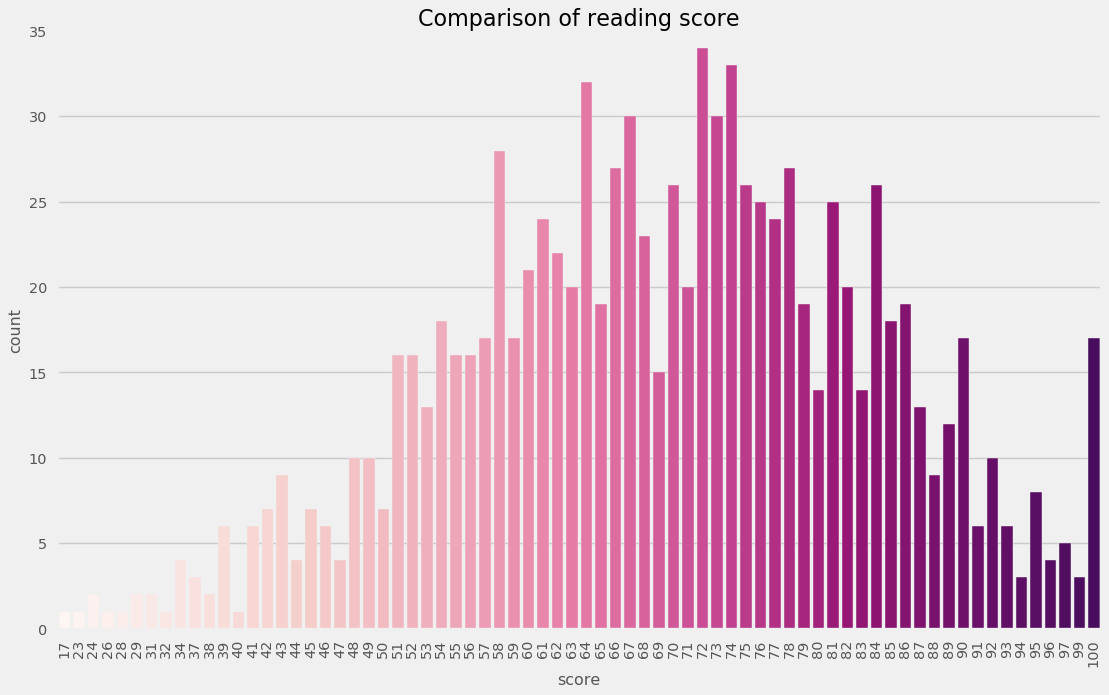

In [31]:
# visualising reading score

plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['reading score'],palette = 'RdPu')
plt.title('Comparison of reading score', fontweight = 30,fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

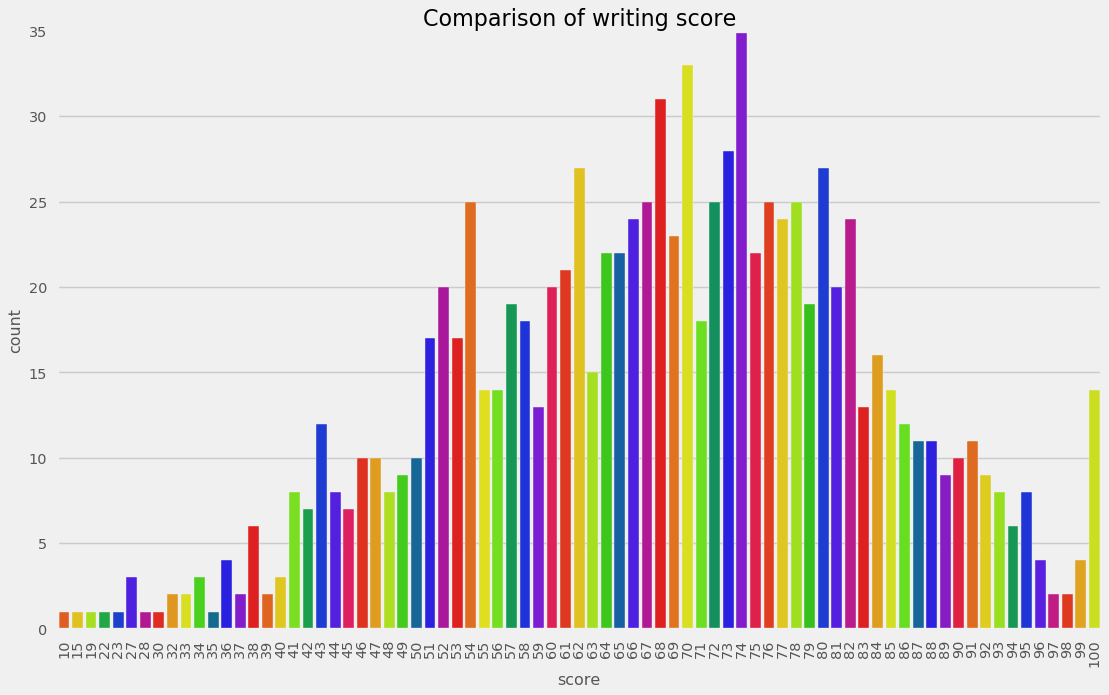

In [32]:
# visualising writing score

plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['writing score'],palette = 'prism')
plt.title('Comparison of writing score', fontweight = 30,fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

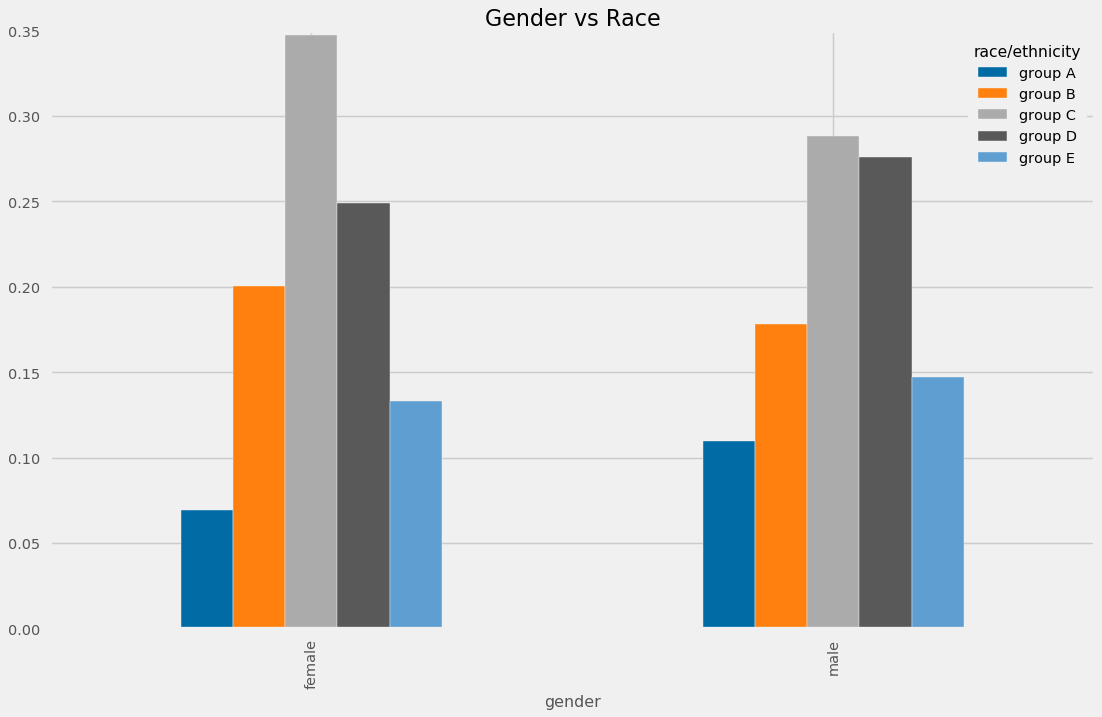

In [33]:
# comparison of gender and race/ethnicity

plt.rcParams['figure.figsize'] = (15,9)
x = pd.crosstab(data['gender'],data['race/ethnicity'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = False)
plt.title('Gender vs Race',fontweight = 30,fontsize = 20)
plt.show()

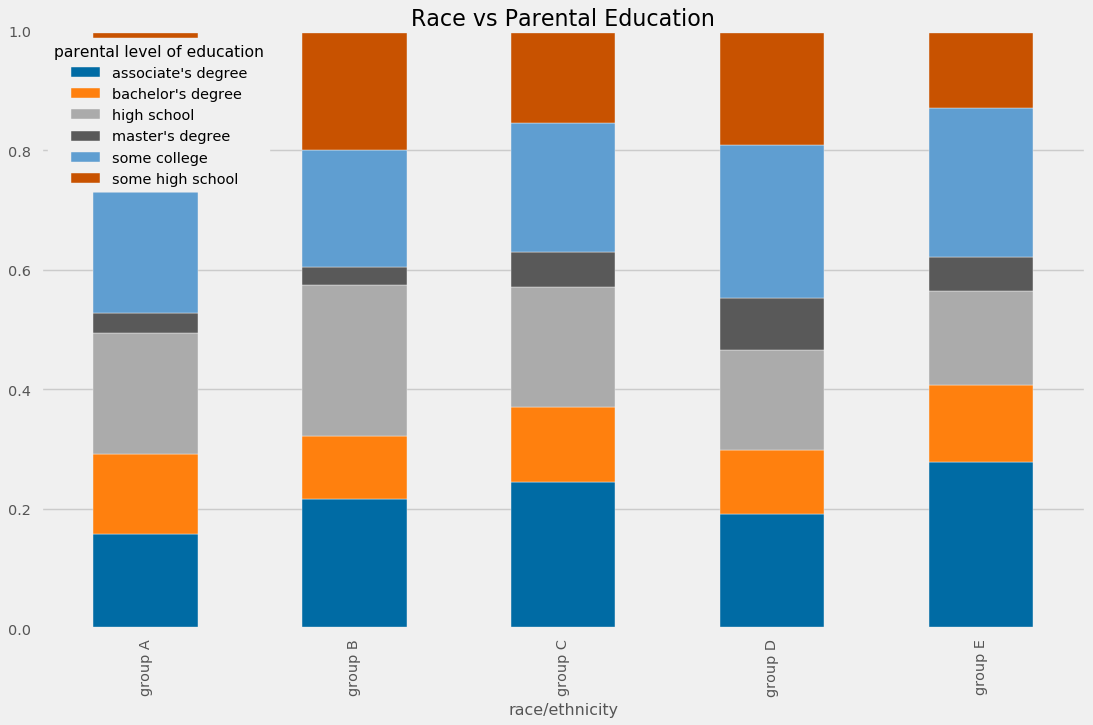

In [34]:
# comparision of race/ethnicity and parental level of education

plt.rcParams['figure.figsize'] = (15,9)
x = pd.crosstab(data['race/ethnicity'],data['parental level of education'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)
plt.title('Race vs Parental Education',fontweight = 30,fontsize = 20)
plt.show()

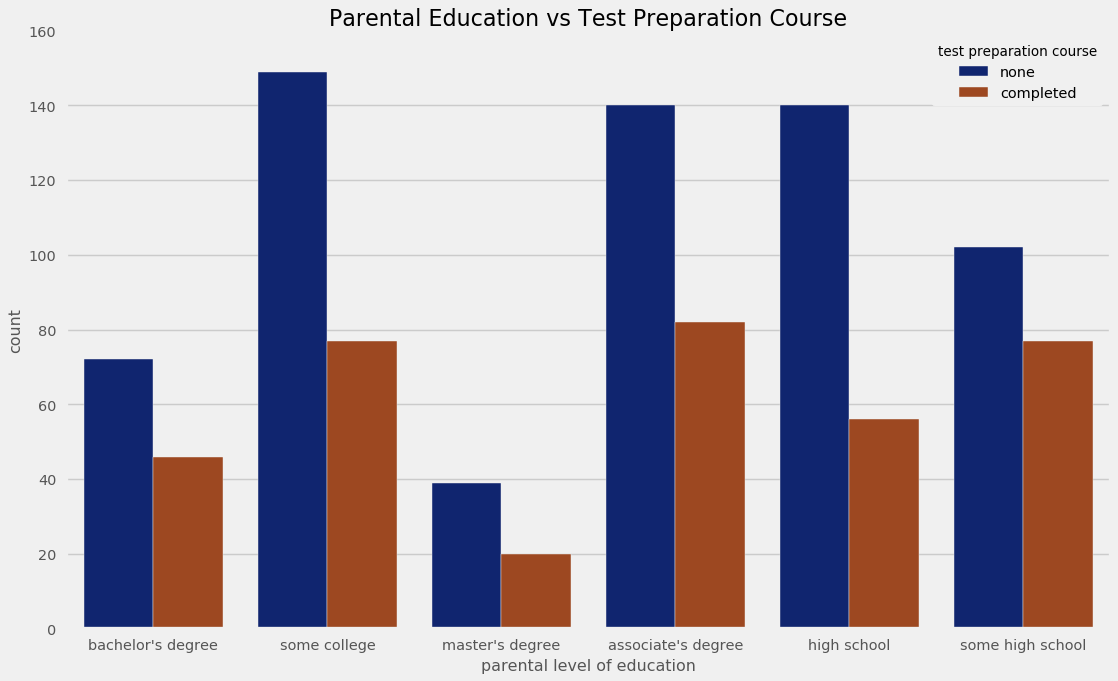

In [35]:
# comparision of parental degree and test preparation

plt.rcParams['figure.figsize'] = (15,9)
sns.countplot(x = 'parental level of education',data = data,hue = 'test preparation course',palette = 'dark')
plt.title('Parental Education vs Test Preparation Course',fontweight = 30,fontsize = 20)
plt.show()

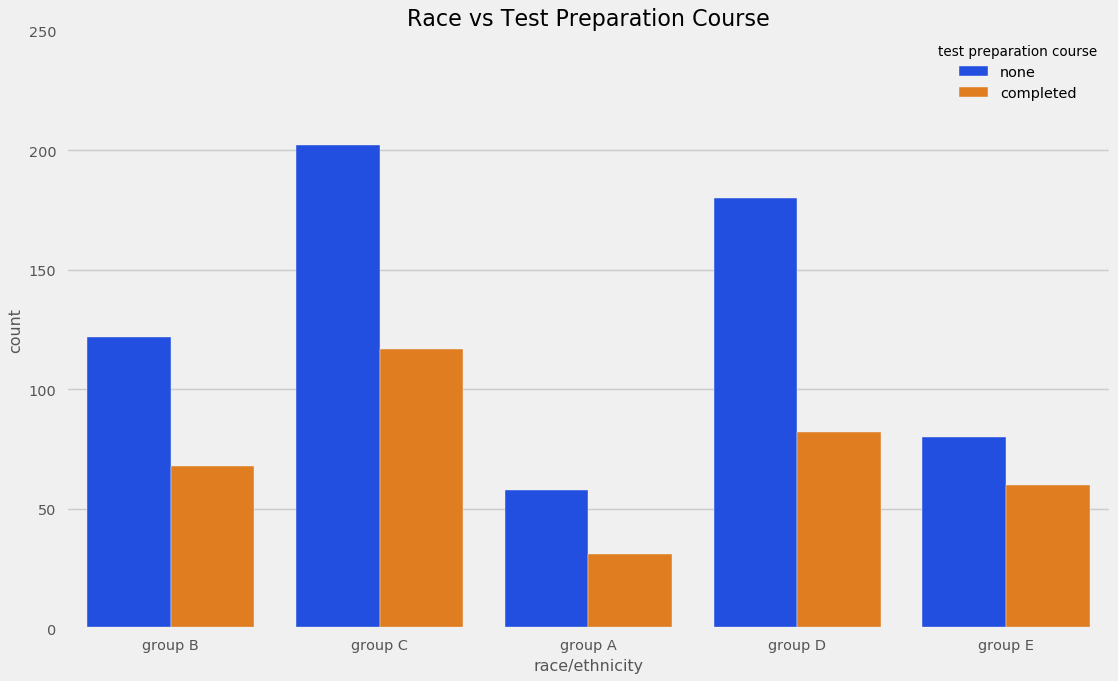

In [36]:
# comparison of race/ethnicity  and test preparation

plt.rcParams['figure.figsize'] = (15,9)
sns.countplot(x = 'race/ethnicity',data = data,hue = 'test preparation course',palette = 'bright')
plt.title('Race vs Test Preparation Course',fontweight = 30,fontsize = 20)
plt.show()

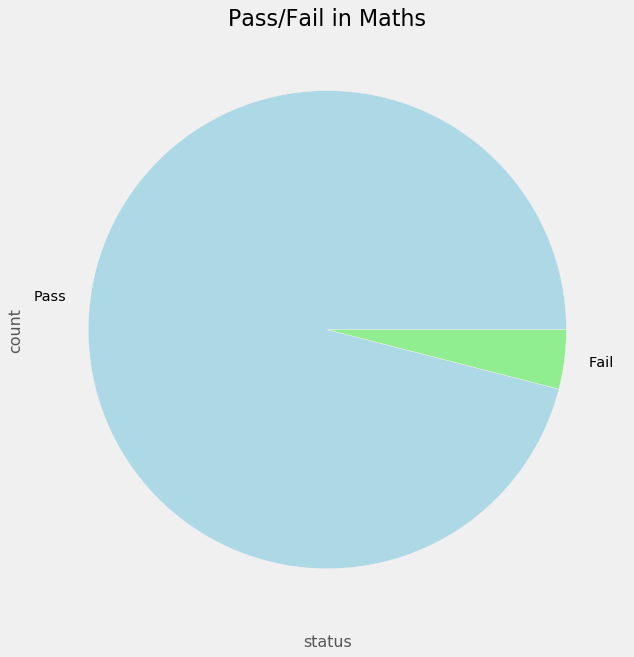

In [37]:
# feature engineering on the data to visualize and solve the dataset more accurately

#setting a pass on the three subjects individually

passmarks = 40

# creating a new column pass_math telling whether the students pass or fail
data['pass_math'] = np.where(data['math score'] < passmarks,'Fail','Pass')
data['pass_math'].value_counts().plot.pie(colors = ['lightblue','lightgreen'])

plt.title('Pass/Fail in Maths',fontweight = 30,fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

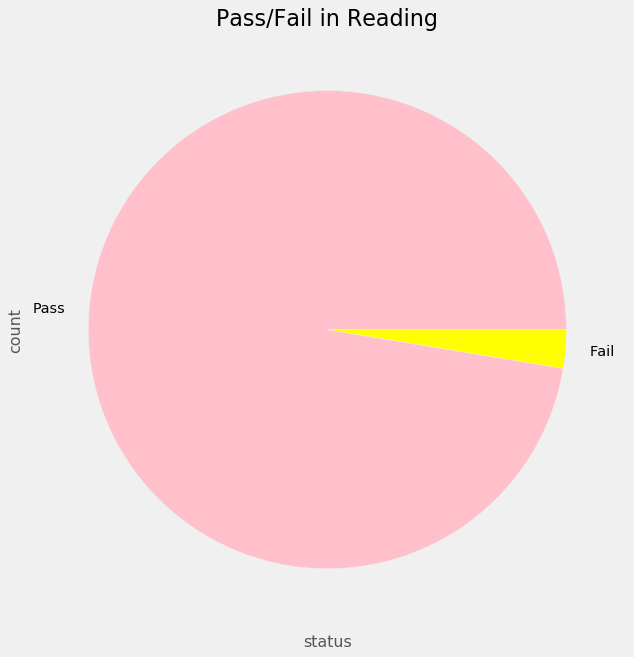

In [38]:
# creating new column pass_reading telling whether the students pass or fail

passmarks = 40

data['pass_reading'] = np.where(data['reading score'] < passmarks,'Fail','Pass')
data['pass_reading'].value_counts().plot.pie(colors = ['pink','yellow'])

plt.title('Pass/Fail in Reading',fontweight = 30,fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

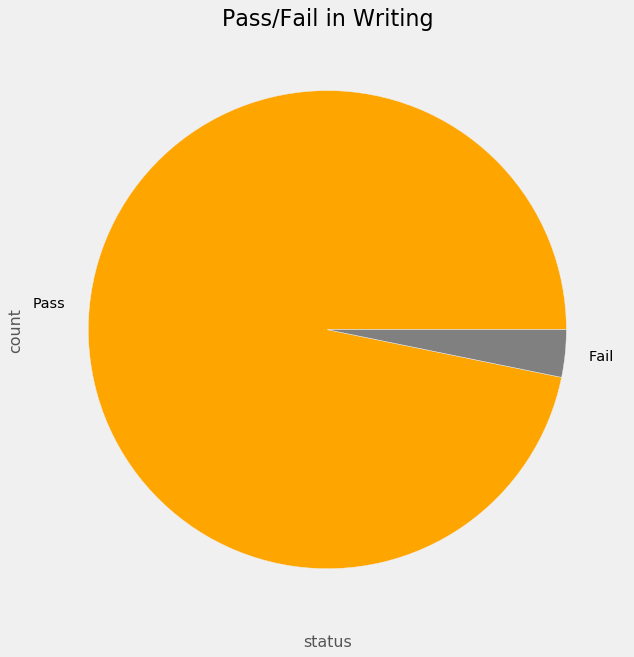

In [39]:
# creating new column pass_reading telling whether the students pass or fail

passmarks = 40

data['pass_writing'] = np.where(data['writing score'] < passmarks,'Fail','Pass')
data['pass_writing'].value_counts().plot.pie(colors = ['orange','gray'])

plt.title('Pass/Fail in Writing',fontweight = 30,fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

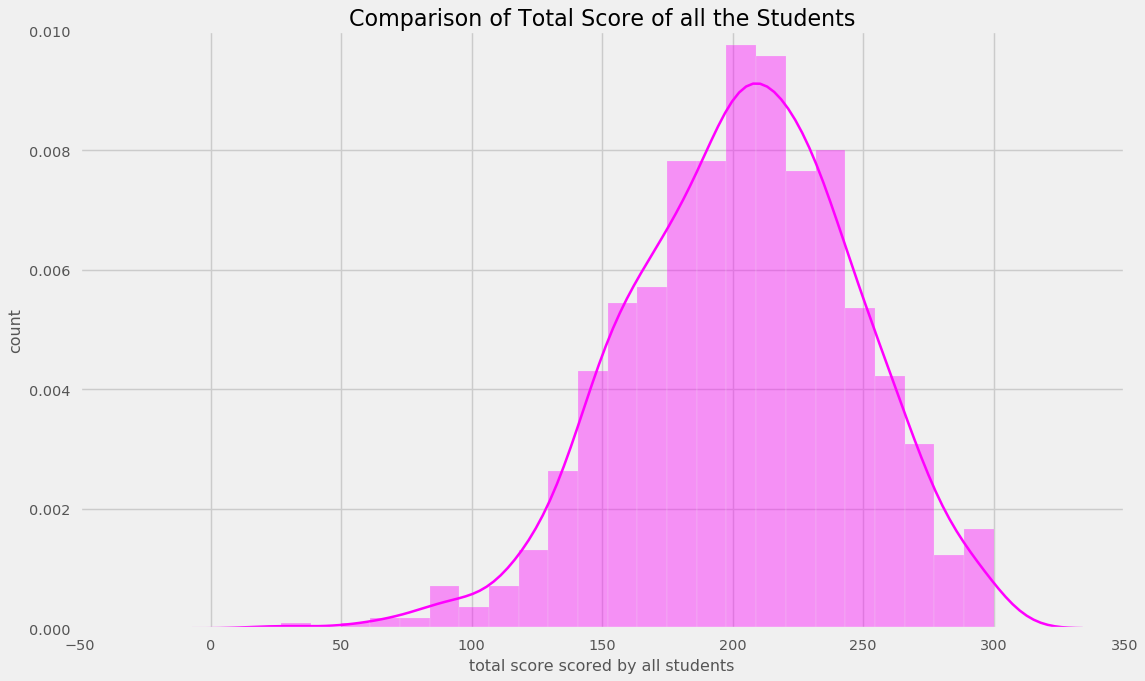

In [40]:
# computing the total score for each student

import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'],color = 'magenta')

plt.title('Comparison of Total Score of all the Students',fontweight = 30,fontsize = 20)
plt.xlabel('total score scored by all students')
plt.ylabel('count')
plt.show()

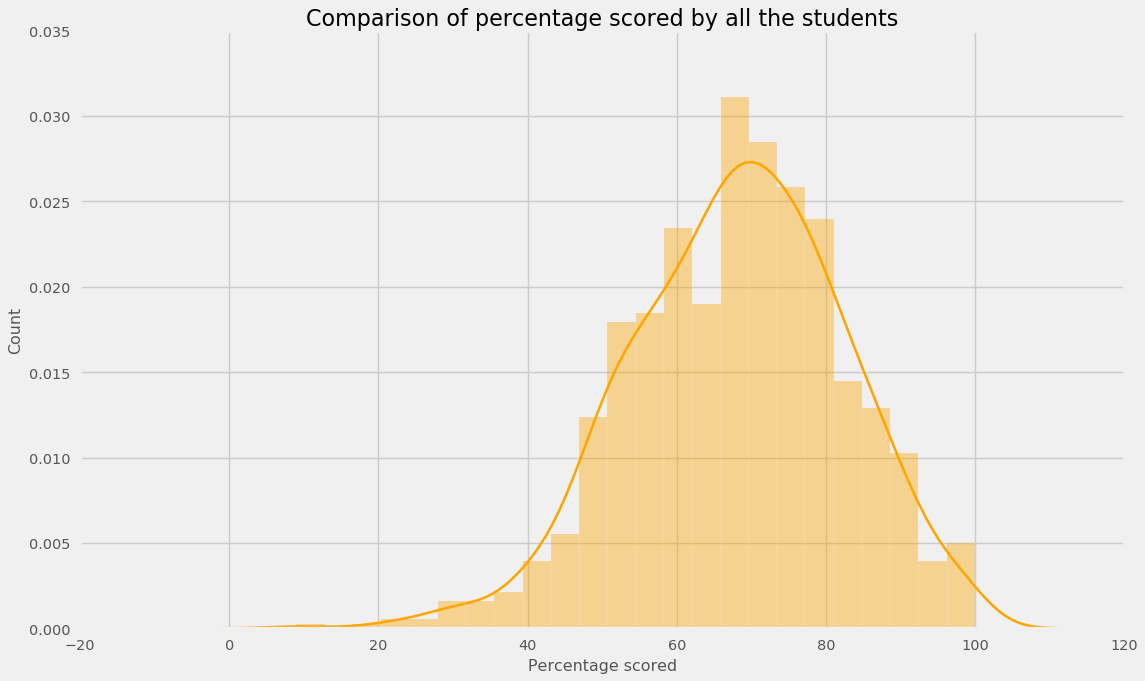

In [41]:
# computing percentage for each of the students

from math import*
import warnings
warnings.filterwarnings('ignore')

data['percentage']  = data['total_score']/3

for i in range(0,1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15,9)
sns.distplot(data['percentage'],color = 'orange')

plt.title('Comparison of percentage scored by all the students',fontweight = 30,fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

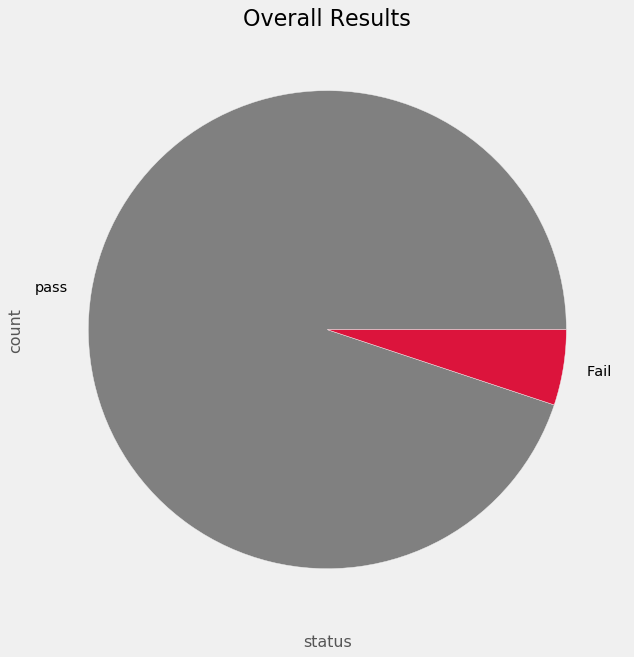

In [42]:
# checking which student is fail overall

data['status'] = data.apply(lambda x  : 'Fail' if x['pass_math'] == 'Fail' or x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail' else 'pass',axis = 1)

data['status'].value_counts(dropna = False).plot.pie(colors = ['grey','crimson'])
plt.title('Overall Results',fontweight = 30,fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [43]:
# assigning grades to the grades according to the following criteria
# 0  -  40 : grade E
# 41 -  60 : grade D
# 61 -  70 : grade C
# 71 -  80 : grade B
# 81 -  90 : grade A
# 91 - 100 : grade O

def getgrade(percentage,status):
    if status == 'Fail':
        return 'E'
    if (percentage >= 90):
        return 'O'
    if (percentage >= 80):
        return 'A'
    if (percentage >= 70):
        return 'B'
    if (percentage >= 60):
        return 'C'
    if (percentage >= 40):
        return 'D'
    else:
        return 'E'
    
data['grades'] = data.apply(lambda x:getgrade(x['percentage'],x['status']),axis = 1)

data['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

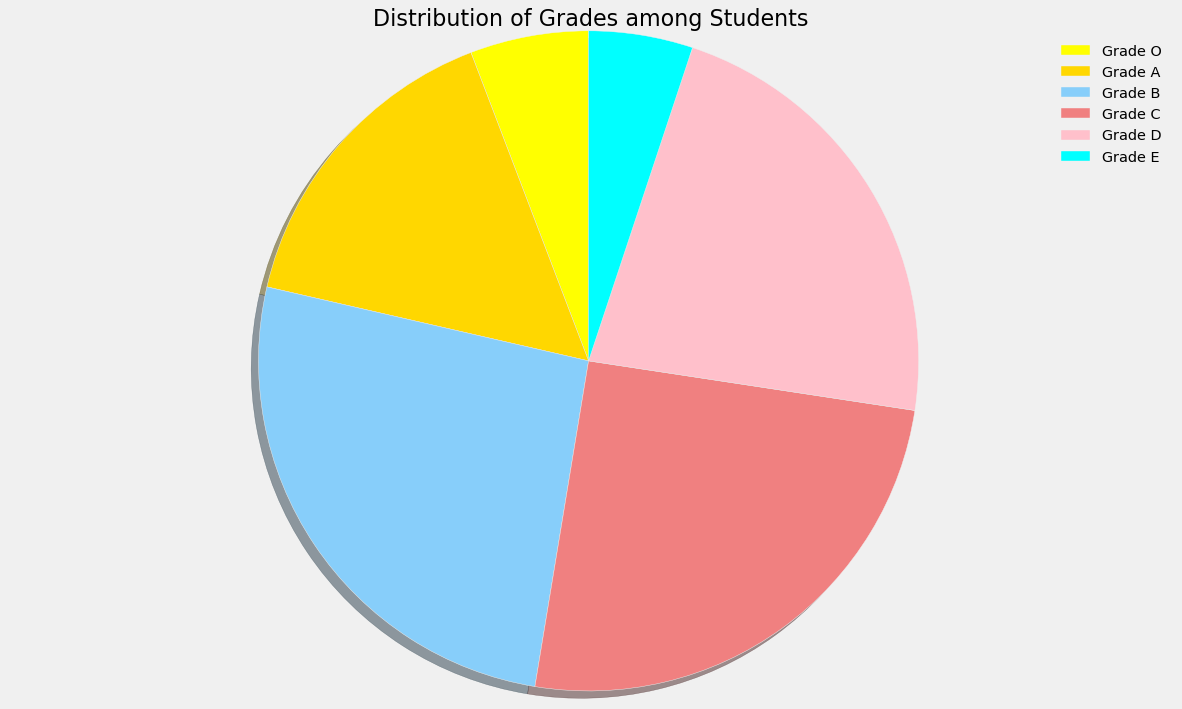

In [44]:
# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade O','Grade A','Grade B','Grade C','Grade D','Grade E']
sizes = [58,156,260,252,223,51]
colors = ['yellow','gold','lightskyblue','lightcoral','pink','cyan']
explode = (0.0001,0.0001,0.0001,0.0001,0.0001,0.0001)

patches,texts = plt.pie(sizes,colors = colors,shadow = True,startangle = 90)
plt.legend(patches,labels)
plt.title('Distribution of Grades among Students',fontweight = 30,fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()

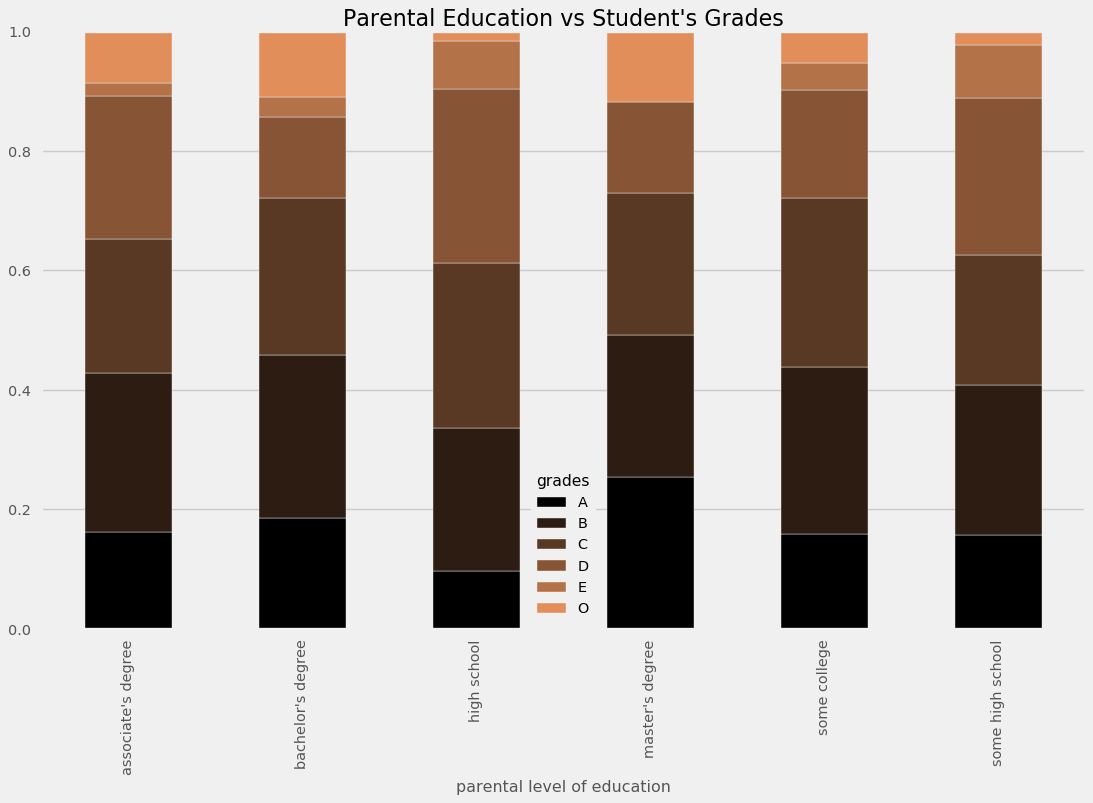

In [45]:
# comparing parental education and student's grade

plt.rcParams['figure.figsize'] = (15,9)

x = pd.crosstab(data['parental level of education'],data['grades'])
color = plt.cm.copper(np.linspace(0,1,8))
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True,color = color)
plt.title("Parental Education vs Student's Grades",fontweight = 30,fontsize = 20)
plt.show()

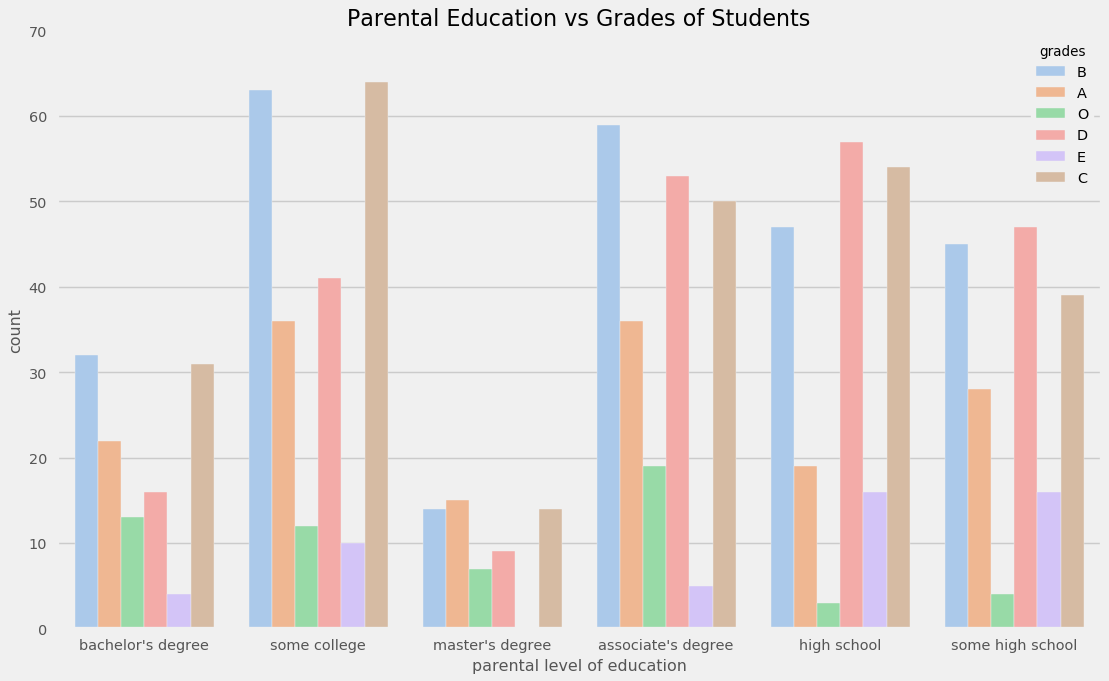

In [46]:
# plotting again using seaborn for better visualization

sns.countplot(x = data['parental level of education'],data = data,hue = data['grades'],palette = 'pastel')
plt.title('Parental Education vs Grades of Students',fontweight = 30,fontsize = 20)
plt.show()

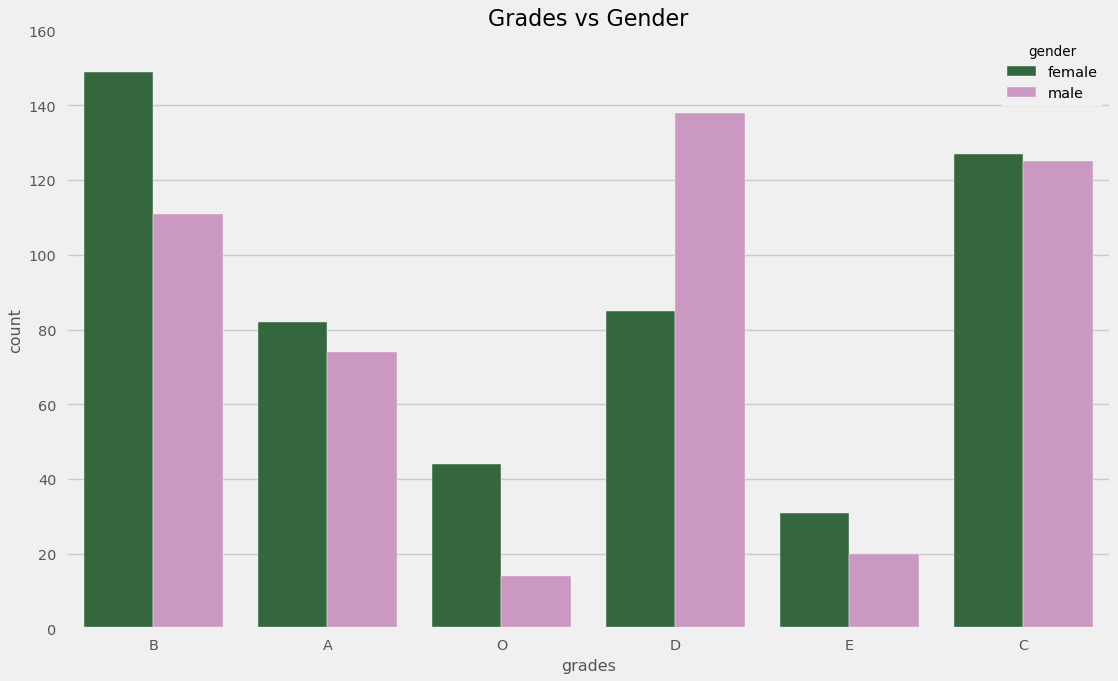

In [47]:
# comparing the distribution of grades amonf males and females

sns.countplot(x = data['grades'],data = data,hue = data['gender'],palette = 'cubehelix')
plt.title('Grades vs Gender',fontweight = 30,fontsize = 20)
plt.show()

##### Label Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoder for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding gor lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# mapping values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A',1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B',2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C',3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D',4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E',5)

# label encoding for parental education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

# label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_math'] = le.fit_transform(data['pass_math'])

# label encoding for pass_reading
data['pass_reading'] = le.fit_transform(data['pass_reading'])

# label encoding for pass_writing
data['pass_writing'] = le.fit_transform(data['pass_writing'])

# label encoding for status
data['status'] = le.fit_transform(data['status'])

### Data Preparation

In [49]:
# splitting the dependent and independent variables

x = data.iloc[:,:14]
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [50]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [51]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

### Modelling

### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

# creating a model
model = LogisticRegression()

model.fit(x_train,y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :",model.score(x_train,y_train))
print("Testing Accuracy :",model.score(x_test,y_test))

Training Accuracy : 0.852
Testing Accuracy : 0.812


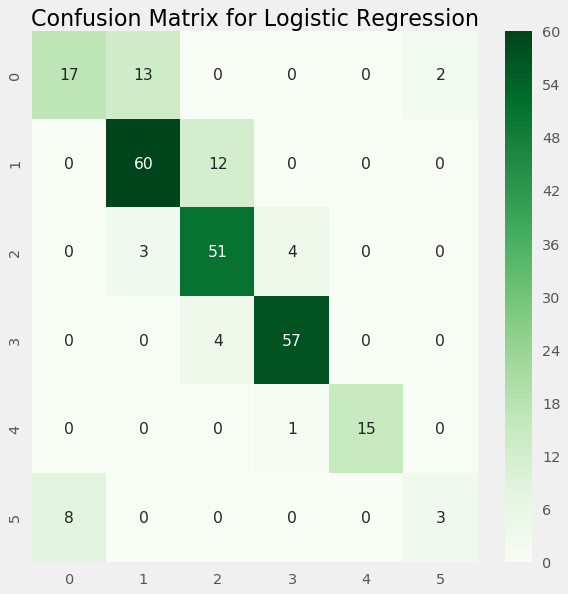

In [53]:
# printing the confusion matrix
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8,8)
sns.heatmap(cm,annot = True,cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression',fontweight = 30,fontsize = 20)
plt.show()

##### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train,y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :",model.score(x_train,y_train))
print("Testing Accuracy :",model.score(x_test,y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


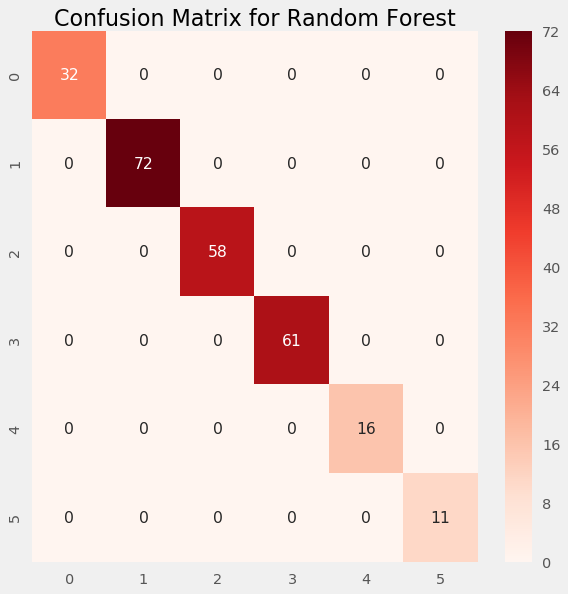

In [55]:
# printing the confusio n matrix
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test,y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8,8)
sns.heatmap(cm,annot = True,cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest',fontweight = 30,fontsize = 20)
plt.show()

In [56]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


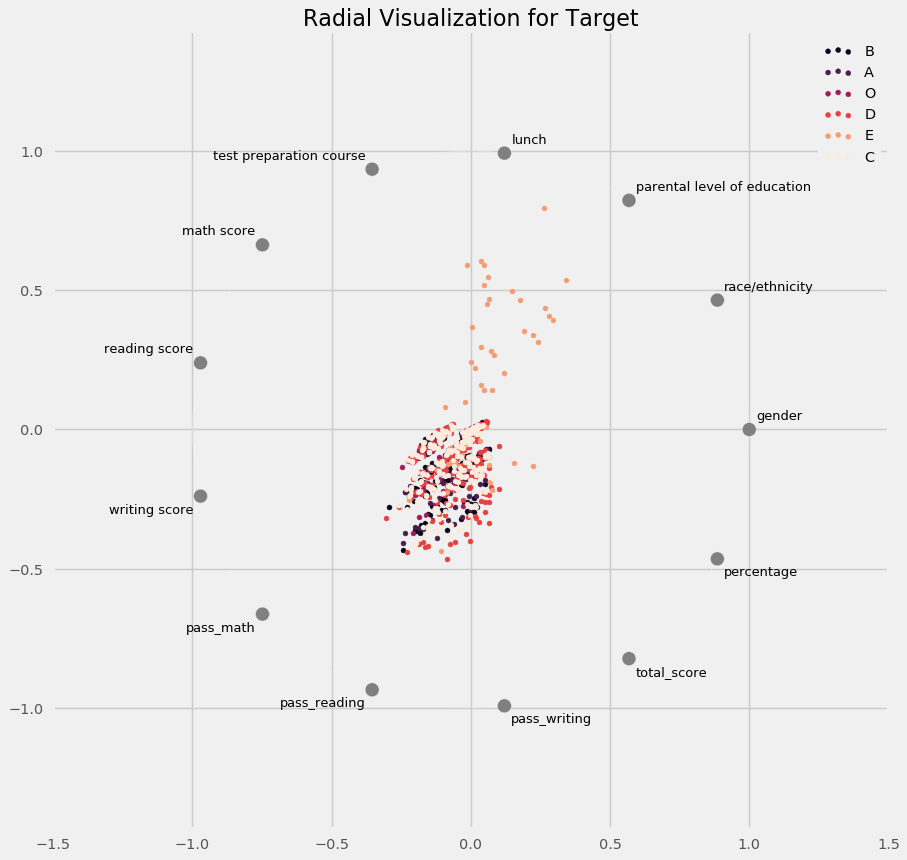

In [57]:
from pandas.plotting import radviz
fig,ax = plt.subplots(figsize = (12,12))
new_df = x.copy()
new_df["status"] = y
radviz(new_df,"status",ax = ax,colormap = "rocket")
plt.title('Radial Visualization for Target',fontsize = 20)
plt.show()